# HMM (Hidden Markov Models)

#### TL; DR
To develop a deeper understanding of HMM

### Reference Material

[lazyprogrammer Github](https://github.com/lazyprogrammer/machine_learning_examples/tree/master/hmm_class)

[HMM_Udemy](https://www.udemy.com/unsupervised-machine-learning-hidden-markov-models-in-python/learn/v4/overview)

### Math

- Conditional Probabilities $P(s_{i}|s_{i-1})$

Orders
- 1st is only the previous state matters

$$P(s_{i}|s_{i-1})$$

- 2nd is the last 2 previous state matters 

$$P(s_{i}|s_{i-1},s_{i-2})$$

- 3rd is...

### Smoothing

Basic idea: give things that have a value of 0 a small value

satisfy the "strictly positive" requirement

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
from future.utils import iteritems
import sys

from datetime import datetime

### MM Example

In [5]:
site_data_df = pd.read_csv('./data/site_data.csv')
print(len(site_data_df))
site_data_df.head()

99999


,-1,8
0,4,8
1,-1,2
2,1,B
3,-1,5
4,7,5


In [6]:
transitions = {}
row_sums = {}

In [8]:
# collect counts
for line in open('./data/site_data.csv'):
    s, e = line.rstrip().split(',')
    transitions[(s, e)] = transitions.get((s, e), 0.) + 1
    row_sums[s] = row_sums.get(s, 0.) + 1

In [10]:
# normalize
for k, v in transitions.items():
    s, e = k
    transitions[k] = v / row_sums[s]

In [15]:
# initial state distributions
# print("initial state distribution")
for k, v in transitions.items():
    s, e = k
    if s == '-1':
        print("initial start page %s: %s" % (e, v))

initial start page 8: 0.10152591025834719
initial start page 2: 0.09507982071813466
initial start page 5: 0.09779926474291183
initial start page 9: 0.10384247368686106
initial start page 0: 0.10298635241980159
initial start page 6: 0.09800070504104345
initial start page 7: 0.09971294757516241
initial start page 1: 0.10348995316513068
initial start page 4: 0.10243239159993957
initial start page 3: 0.09513018079266758


In [13]:
# which page has the highest bounce?
for k, v in transitions.items():
    s, e = k
    if e == 'B':
        print("bounce rate for %s: %s" % (s, v))

bounce rate for 1: 0.125939617991374
bounce rate for 2: 0.12649551345962112
bounce rate for 8: 0.12529550827423167
bounce rate for 6: 0.1208153180975911
bounce rate for 7: 0.12371650388179314
bounce rate for 3: 0.12743384922616077
bounce rate for 4: 0.1255756067205974
bounce rate for 5: 0.12369559684398065
bounce rate for 0: 0.1279673590504451
bounce rate for 9: 0.13176232104396302


**Takeaways**

- Page 9 has the highest start page
- Page 9 has the highest bounce rate

### MM Using Text Analysis

Predicting next word

In [27]:
initial = {}
second_word = {}
transitions = {}

In [31]:
def remove_punctuation(s):
    return s.translate(str.maketrans('','',string.punctuation))

def add2dict(d, k, v):
    if k not in d:
        d[k] = []
    d[k].append(v)

In [32]:
for line in open('./data/robert_frost.txt'):
    tokens = remove_punctuation(line.rstrip().lower()).split()
    
    T = len(tokens)
    for i in range(T):
        t = tokens[i]
        if i == 0:
            initial[t] = initial.get(t, 0.) + 1
        else:
            t_1 = tokens[i-1]
            if i == T-1:
                add2dict(transitions, (t_1, t), 'END')
            if i == 1:
                add2dict(second_word, t_1, t)
            else:
                t_2 = tokens[i-2]
                add2dict(transitions, (t_2, t_1), t)

In [42]:
# normalize the initial
initial_total = sum(initial.values())
for t, c in initial.items():
    initial[t] = c / initial_total

In [45]:
def list2pdict(ts):
    d = {}
    n = len(ts)
    for t in ts:
        d[t] = d.get(t, 0.) + 1
    for t, c in d.items():
        d[t] = c / n
    return d

In [46]:
for t_1, ts in second_word.items():
    second_word[t_1] = list2pdict(ts)
    
for k, ts in transitions.items():
    transitions[k] = list2pdict(ts)

In [47]:
def sample_word(d):
    p0 = np.random.random()
    cumulative = 0
    for t, p in d.items():
        cumulative += p
        if p0 < cumulative:
            return t
    assert(False)

In [52]:
def generate():
    for i in range(1):
        sentence = []
        
        w0 = sample_word(initial)
        sentence.append(w0)
        
        w1 = sample_word(second_word[w0])
        sentence.append(w1)
        
        while True:
            w2 = sample_word(transitions[w0, w1])
            if w2 == 'END':
                break
            sentence.append(w2)
            w0 = w1
            w1 = w2
        print(' '.join(sentence))

In [53]:
generate()

here loveless birds now flock as winter friends


In [50]:
 generate()

he guessed theyd know what a name should matter between us
to set the voices speaking out of forty firkins
dont build me a resurrected tree
who wants to get at


In [56]:
second_word['to']

{'where': 0.02,
 'watch': 0.04,
 'stop': 0.02,
 'ask': 0.02,
 'say': 0.04,
 'carry': 0.02,
 'think': 0.02,
 'make': 0.12,
 'everything': 0.02,
 'spare': 0.02,
 'see': 0.1,
 'turn': 0.02,
 'undo': 0.02,
 'let': 0.02,
 'go': 0.02,
 'shut': 0.02,
 'bring': 0.02,
 'entertain': 0.02,
 'find': 0.02,
 'send': 0.02,
 'such': 0.02,
 'wonder': 0.02,
 'no': 0.02,
 'tell': 0.02,
 'stand': 0.02,
 'reconnoitre': 0.02,
 'set': 0.02,
 'blow': 0.02,
 'ridgely': 0.02,
 'the': 0.04,
 'curl': 0.02,
 'call': 0.02,
 'which': 0.02,
 'be': 0.02,
 'drag': 0.02,
 'come': 0.02,
 'live': 0.02,
 'break': 0.02}

In [61]:
transitions

{('two', 'roads'): {'diverged': 1.0},
 ('roads', 'diverged'): {'in': 1.0},
 ('diverged', 'in'): {'a': 1.0},
 ('in', 'a'): {'yellow': 0.07142857142857142,
  'wood': 0.07142857142857142,
  'window': 0.07142857142857142,
  'packing': 0.07142857142857142,
  'byroad': 0.07142857142857142,
  'family': 0.07142857142857142,
  'new': 0.07142857142857142,
  'row': 0.07142857142857142,
  'time': 0.07142857142857142,
  'town': 0.07142857142857142,
  'book': 0.07142857142857142,
  'smother': 0.07142857142857142,
  'glass': 0.14285714285714285},
 ('yellow', 'wood'): {'END': 1.0},
 ('a', 'yellow'): {'wood': 1.0},
 ('and', 'sorry'): {'i': 1.0},
 ('sorry', 'i'): {'could': 0.5, 'ever': 0.5},
 ('i', 'could'): {'not': 0.2, 'END': 0.2, 'have': 0.2, 'see': 0.3, 'do': 0.1},
 ('could', 'not'): {'travel': 0.5, 'say': 0.5},
 ('travel', 'both'): {'END': 1.0},
 ('not', 'travel'): {'both': 1.0},
 ('and', 'be'): {'one': 0.5, 'whole': 0.5},
 ('be', 'one'): {'traveler': 1.0},
 ('one', 'traveler'): {'long': 1.0},
 ('t

---
## HMM


#### How is HMM different from MM

*MM* 

- next state depends only on previous state 

- only revolves around 2 things primarily: probability of sequence & model training

*HMM* 

- observed state $s_{k}$ only depends on state $s_{j}$, does not depend on state at any other time, does not depend on any other observation

- 1 additional task to HMM is to get most likley "hidden state

- training a HMM is more computationally expensive and can test the limits of numerical accuracy


3 parts: $\pi$, A, B

- $\pi_{i}$ probability of starting at state i
- A(i, j) probability of goin to state j from state i
- B(j, k) probability of observing symbol k in state j


**Doubly Embedded** Stochastic Processes (2 layers)

1. Inner-most Layer = Markov Model
2. Next Layer = Choose Observation

#### Hidden States --> Neural Nets (layers)

- number of hidden states is a hyperparameter
- can get with cross-validation (T-Test can show which model is superior)

**KEY:** Post cross-validation choose the hidden states with highest accuracy

### Math

$$p(x,z)=\pi(z_{1})p(x_{1}|z_{1})\prod_{t=2}^T p(z_{t}|z_{t-1})p(x_{t}|z_{t})$$

Time Complexity: $O(TM^T)$ - exponential (nested for loops with T as the times M as the states)

#### Forward-Backward Algo Approach (3 Steps)

*Forward Algo*

Time Complexity: $O(M^2T)$ -  polynomial instead of exponential

**Define a new variable** $\alpha(t,i)=p(x_{1},x_{2},...,x_{t},z_{t})=1$

1) initialization step (t=1)
$$\alpha(t,i)=\pi_{i}B(i,x_{t})$$

2) Induction step (for every state and time t>1 up to T or steps after initialization step)
$$\alpha(t+1,j)=\sum_{i=1}^M\alpha(t,i)A(i,j)B(j,x_{t+})$$

3) Termination step (t=T)
$$p(x)=\sum_{i=1}^M\alpha(T,i)=\sum_{i=1}^M p(x_{1},...,x{T},z_{T}=i)$$

*Backward Algo*
essentially the reverse of the Forward

**Define**
$$\beta(t,i)=p(x_{t+1},...,x_{T}|z_{t}=i)$$

1) Initialization step (t=T, $\beta$ is 1 for all states)
$$\beta(T,i)=1$$

2) Induction step (t<T down to 1)
$$\beta(t,i)=\sum_{j=1}^M A(i,j)B(j,x_{t+1})\beta(t+1,j)$$

**PseudoCode**
#fowards<br>
`alpha = np.zeros((T, self.M))`<br>
`alpha[0] = pi*B[:,x[0]] # initialization step`<br>
`for t in range(1, T):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`alpha[t] = alpha[t-1].dot(A) * B[:, x[t]] # induction step`<br>
`observation_prob = alpha[-1].sum() # termination`<br>

#backwards<br>
`beta = np.zeros((T, M))`<br>
`beta[-1] = 1 # initialization step`<br>
`for t in range(T-2, -1, -1):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`beta[t] = A.dot(B[:, x[t+1]] * beta[t+1]) # induction step`<br>

### Viterbi Algorithm

"The most probable hidden states sequence given the sequence under the current model"

*like the forward algo but uses max instead of sum*

Includes 2 new variables:

$$\delta(t,i)=max{p(z(1),...z(t)=i,x(1),...,x(t))}$$

to keep track of states up to time t in state i

$$\psi(t,i)$$ 

#### 3 Steps

1) Initialization 

$$\delta(1,i)=\pi_{i}B(i,x(1))$$
$$\psi(1,i)=0$$

2) Recursion

$$\delta(t,j)=max_{1\leq i\leq M}{\delta(t-1,i)A(i,j)}B(j,x(t))$$

$$\psi(t,j)=argmax_{1\leq i\leq M}{\delta(t-1,i)A(i,j)}$$

3) Termination

- Find max probability
$$p^* = max_{1\leq i\leq M}\delta(T,i)$$
- Best last state
$$z(T)^* = argmax_{1\leq i\leq M}\delta(T,i)$$
- Previous best states
$$z(t)^*=\psi(t+1,z(t+1)^*)$$

**PseudoCode**

`#forward`<br>
`delta = np.zeros((T, M))`<br>
`psi = np.zeros((T, N))` <br>
`delta[0] = pi * B[:, x[0]] # initialization`<br>
`for t in range(1, T)"`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for j in range(M):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`delta[t,j] = np.max(delta[t-1] * A[:, j]) * B[j, x[t]] # gives us the best probability overall`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`psi[t,j] = np.argmax(delta[t-1] * A[:, j]) # gives us the best last state`<br>

`#backward`<br>
`states = np.zeros(T, dtype=np.int32)`<br>
`states[T-1] = np.argmax(delta[T-1]]`<br>
`for t in range(T-2, -1, -1):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`states[t] = psi[t+1, states[t+1]]`<br>
`return states`<br>

### Baum-Welch Algorithm

- How to train an HMM
- similar to Gaussian Mixture Models
- Use Expectation-Maximization iterative algorithm

**Define**
$$\phi(t,i,j)=p(z(t)=i,z(t+1)=j|x)$$

$$\gamma(t,i)=\sum_{j=1}^M \phi(t,i,j)$$

*Summing over time*
$$\sum_{t=1}^{T-1}\gamma(t,i)=E(\text{num of transitions from state i})$$

$$\sum_{t=1}^{T-1}\phi(t,i,j)=E(\text{num of transitions from state i to state j})$$

*Update*

$$\pi_{i}=\gamma(1,i)$$

$$A(i,j)=\frac{\sum_{t=1}^{T-1}\phi(t,i,j)}{\sum_{t=1}^{T-1}\gamma(t,i)}$$

$$B(i,k)=\frac{\sum_{t=1}^{T-1}\gamma(t,i)\text{ if } x(t)=k,\text{else}\ 0}{\sum_{t=1}^{T-1}\gamma(t,i)}$$

**PseudoCode**

`pi = np.sum((alphas[n][0] * betas[n][0]) / P[n] for n in range(N)) / N # pi`<br>

`# A update`<br>
`a_num = np.zeros((M, M))`<br>
`for n in range(N):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`x = X[n]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`T = len(x)`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`den1 += (alphas[n][:-1] * betas[n][:-1]).sum(axis=0, keepdims=True).T / P[n]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`a_num_n = np.zeros((M, M))`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for i in range(M):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for j in range(M):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for t in range(T-1):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`a_num_n[i, j] += alpha[n][t, i] * betas[n][t+1, j] * A[i, j] * B[j, x[t+1]]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`a_num += a_num_n / P[n]`<br>
`A =a_num /den1`<br>

`# B update`<br>
`b_num = np.zeros((M, V))`<br>
`for n in range(N):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`x = X[n]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`T = len(x)`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`den2 += (alphas[n] * betas[n]).sum(axis=0, keepdims=True).T / P[n]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b_num_n = np.zeros((M, V))`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for i in range(M):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for j in range(V):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`for t in range(T):`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`if x[t] == j:`<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b_num[i, j] += alphas[n][t][i] * betas[n][t][i]`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b_num += b_num_n / P[n]`<br>
`B =a_num /den2`<br>

#### Multiple Observations

- variable length sequences like in text

#### Coin Toss Example

In [70]:
class HMM:
    def __init__(self, M):
        self.M = M # number of hidden states
    
    def fit(self, X, max_iter=30):
        t0 = datetime.now()
        np.random.seed(123)
        # train the HMM model using the Baum-Welch algorithm
        # a specific instance of the expectation-maximization algorithm

        # determine V, the vocabulary size
        # assume observables are already integers from 0..V-1
        # X is a jagged array of observed sequences
        V = max(max(x) for x in X) + 1
        N = len(X)

        self.pi = np.ones(self.M) / self.M # initial state distribution
        self.A = random_normalized(self.M, self.M) # state transition matrix
        self.B = random_normalized(self.M, V) # output distribution

        print("initial A:", self.A)
        print("initial B:", self.B)

        costs = []
        for it in range(max_iter):
            if it % 10 == 0:
                print("it:", it)
            alphas = []
            betas = []
            P = np.zeros(N)
            for n in range(N):
                x = X[n]
                T = len(x)
                alpha = np.zeros((T, self.M))
                alpha[0] = self.pi*self.B[:,x[0]]
                for t in range(1, T):
                    tmp1 = alpha[t-1].dot(self.A) * self.B[:, x[t]]
                    # tmp2 = np.zeros(self.M)
                    # for i in range(self.M):
                    #     for j in range(self.M):
                    #         tmp2[j] += alpha[t-1,i] * self.A[i,j] * self.B[j, x[t]]
                    # print "diff:", np.abs(tmp1 - tmp2).sum()
                    alpha[t] = tmp1
                P[n] = alpha[-1].sum()
                alphas.append(alpha)

                beta = np.zeros((T, self.M))
                beta[-1] = 1
                for t in range(T - 2, -1, -1):
                    beta[t] = self.A.dot(self.B[:, x[t+1]] * beta[t+1])
                betas.append(beta)

            # print "P:", P
            # break
            assert(np.all(P > 0))
            cost = np.sum(np.log(P))
            costs.append(cost)

            # now re-estimate pi, A, B
            self.pi = np.sum((alphas[n][0] * betas[n][0])/P[n] for n in range(N)) / N
            # print "self.pi:", self.pi
            # break

            den1 = np.zeros((self.M, 1))
            den2 = np.zeros((self.M, 1))
            a_num = 0
            b_num = 0
            for n in range(N):
                x = X[n]
                T = len(x)
                # print "den shape:", den.shape
                # test = (alphas[n][:-1] * betas[n][:-1]).sum(axis=0, keepdims=True).T
                # print "shape (alphas[n][:-1] * betas[n][:-1]).sum(axis=0): ", test.shape
                den1 += (alphas[n][:-1] * betas[n][:-1]).sum(axis=0, keepdims=True).T / P[n]
                den2 += (alphas[n] * betas[n]).sum(axis=0, keepdims=True).T / P[n]

                # tmp2 = np.zeros((self.M, 1))
                # for i in range(self.M):
                #     for t in range(T-1):
                #         tmp2[i] += alphas[n][t,i] * betas[n][t,i]
                # tmp2 /= P[n]
                # # print "diff:", np.abs(tmp1 - tmp2).sum()
                # den += tmp1

                # numerator for A
                a_num_n = np.zeros((self.M, self.M))
                for i in range(self.M):
                    for j in range(self.M):
                        for t in range(T-1):
                            a_num_n[i,j] += alphas[n][t,i] * self.A[i,j] * self.B[j, x[t+1]] * betas[n][t+1,j]
                a_num += a_num_n / P[n]

                # numerator for B
                # b_num_n = np.zeros((self.M, V))
                # for i in range(self.M):
                #     for j in range(V):
                #         for t in range(T):
                #             if x[t] == j:
                #                 b_num_n[i,j] += alphas[n][t][i] * betas[n][t][i]
                b_num_n2 = np.zeros((self.M, V))
                for i in range(self.M):
                    for t in range(T):
                        b_num_n2[i,x[t]] += alphas[n][t,i] * betas[n][t,i]
                b_num += b_num_n2 / P[n]
            # tmp1 = a_num / den1
            # tmp2 = np.zeros(a_num.shape)
            # for i in range(self.M):
            #     for j in range(self.M):
            #         tmp2[i,j] = a_num[i,j] / den1[i]
            # print "diff:", np.abs(tmp1 - tmp2).sum()
            # print "tmp1:", tmp1
            # print "tmp2:", tmp2
            self.A = a_num / den1
            self.B = b_num / den2
            # print "P:", P
            # break
        print("A:", self.A)
        print("B:", self.B)
        print("pi:", self.pi)

        print("Fit duration:", (datetime.now() - t0))

        plt.plot(costs)
        plt.show()

    def likelihood(self, x):
        # returns log P(x | model)
        # using the forward part of the forward-backward algorithm
        T = len(x)
        alpha = np.zeros((T, self.M))
        alpha[0] = self.pi*self.B[:,x[0]]
        for t in range(1, T):
            alpha[t] = alpha[t-1].dot(self.A) * self.B[:, x[t]]
        return alpha[-1].sum()

    def likelihood_multi(self, X):
        return np.array([self.likelihood(x) for x in X])

    def log_likelihood_multi(self, X):
        return np.log(self.likelihood_multi(X))

    def get_state_sequence(self, x):
        # returns the most likely state sequence given observed sequence x
        # using the Viterbi algorithm
        T = len(x)
        delta = np.zeros((T, self.M))
        psi = np.zeros((T, self.M))
        delta[0] = self.pi*self.B[:,x[0]]
        for t in range(1, T):
            for j in range(self.M):
                delta[t,j] = np.max(delta[t-1]*self.A[:,j]) * self.B[j, x[t]]
                psi[t,j] = np.argmax(delta[t-1]*self.A[:,j])

        # backtrack
        states = np.zeros(T, dtype=np.int32)
        states[T-1] = np.argmax(delta[T-1])
        for t in range(T-2, -1, -1):
            states[t] = psi[t+1, states[t+1]]
        return states

In [71]:
def fit_coin():
    X = []
    for line in open('./data/coin_data.txt'):
        x = [1 if e == 'H' else 0 for e in line.rstrip()]
        X.append(x)
        
    hmm = HMM(2)
    hmm.fit(X)
    L = hmm.log_likelihood_multi(X).sum()
    print(f"LL w/ fitted params: {L}")
    
    hmm.pi = np.array([0.5, 0.5])
    hmm.A = np.array([[0.1, 0.9], [0.8, 0.2]])
    hmm.B = np.array([[0.6, 0.4], [0.3, 0.7]])
    L = hmm.log_likelihood_multi(X).sum()
    print(f"LL w/ true params: {L}")
    
    # try Viterbi
    print(f"Best state sequence for: {X[0]}")
    print(hmm.get_state_sequence(X[0]))

initial A: [[0.7087962  0.2912038 ]
 [0.29152056 0.70847944]]
initial B: [[0.62969057 0.37030943]
 [0.58883752 0.41116248]]
it: 0


/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


it: 10
it: 20
A: [[0.70386662 0.29613338]
 [0.28712763 0.71287237]]
B: [[0.54419694 0.45580306]
 [0.53723247 0.46276753]]
pi: [0.50695647 0.49304353]
Fit duration: 0:00:00.653991


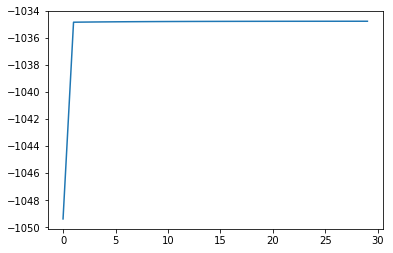

LL w/ fitted params: -1034.7557547352071
LL w/ true params: -1059.7229160265022
Best state sequence for: [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [74]:
if __name__ == "__main__":
    fit_coin()

---
#### Underflow Problem

"Multiplying by very long sequence of small numbers --> vanishing alphas"

#### Scaling Forward

Create a scale factor $c(t), t=1,..., T$

1) Initialize 

$$\alpha'=\pi_{i}B(j,x(1))=\alpha(1,i)$$

Define a scale

$$c(t)=\sum_{i=1}^M\alpha'(t,i)$$
$$\hat{\alpha}(t,i)=frac{\alpha'(t,i)}{c(t)}$$

Scale temporary variable

$$\hat{\alpha}(1,i)=\frac{\pi_{i}B(j,x(1))}{c(1)}$$

2) Induction Step

Temporary variable

$$\alpha'(t,j)=\sum_{t=1}^M\hat{\alpha}(t-1,i)A(i,j)B(j,x(t))$$

scale as before

$$\hat{\alpha}(t,i)=\frac{\alpha'(t,i)}{c(t)}$$

3) Termination

$$p(x)=\prod_{t=1}^T c(t)$$

Use log probabilities

#### Scaling Backward

1) Initialize

$$\hat(\beta}(T,i)=1$$

2) Induction

$$\hat{\beta}(t,i)=\frac{\sum_{j=1}^N A(i,j)B(j,x(t+1))\hat{\beta}(t+1,j)}{c(t+1)}$$

In [75]:
class HMM:
    def __init__(self, M):
        self.M = M # number of hidden states
    
    def fit(self, X, max_iter=30):
        np.random.seed(123)
        # train the HMM model using the Baum-Welch algorithm
        # a specific instance of the expectation-maximization algorithm

        # determine V, the vocabulary size
        # assume observables are already integers from 0..V-1
        # X is a jagged array of observed sequences
        V = max(max(x) for x in X) + 1
        N = len(X)

        self.pi = np.ones(self.M) / self.M # initial state distribution
        self.A = random_normalized(self.M, self.M) # state transition matrix
        self.B = random_normalized(self.M, V) # output distribution

        print("initial A:", self.A)
        print("initial B:", self.B)

        costs = []
        for it in range(max_iter):
            if it % 10 == 0:
                print("it:", it)
            # alpha1 = np.zeros((N, self.M))
            alphas = []
            betas = []
            scales = []
            logP = np.zeros(N)
            for n in range(N):
                x = X[n]
                T = len(x)
                scale = np.zeros(T)
                # alpha1[n] = self.pi*self.B[:,x[0]]
                alpha = np.zeros((T, self.M))
                alpha[0] = self.pi*self.B[:,x[0]]
                scale[0] = alpha[0].sum()
                alpha[0] /= scale[0]
                for t in range(1, T):
                    alpha_t_prime = alpha[t-1].dot(self.A) * self.B[:, x[t]]
                    scale[t] = alpha_t_prime.sum()
                    alpha[t] = alpha_t_prime / scale[t]
                logP[n] = np.log(scale).sum()
                alphas.append(alpha)
                scales.append(scale)

                beta = np.zeros((T, self.M))
                beta[-1] = 1
                for t in range(T - 2, -1, -1):
                    beta[t] = self.A.dot(self.B[:, x[t+1]] * beta[t+1]) / scale[t+1]
                betas.append(beta)


            cost = np.sum(logP)
            costs.append(cost)

            # now re-estimate pi, A, B
            self.pi = np.sum((alphas[n][0] * betas[n][0]) for n in range(N)) / N

            den1 = np.zeros((self.M, 1))
            den2 = np.zeros((self.M, 1))
            a_num = np.zeros((self.M, self.M))
            b_num = np.zeros((self.M, V))
            for n in range(N):
                x = X[n]
                T = len(x)
                den1 += (alphas[n][:-1] * betas[n][:-1]).sum(axis=0, keepdims=True).T
                den2 += (alphas[n] * betas[n]).sum(axis=0, keepdims=True).T

                # numerator for A
                # a_num_n = np.zeros((self.M, self.M))
                for i in range(self.M):
                    for j in range(self.M):
                        for t in range(T-1):
                            a_num[i,j] += alphas[n][t,i] * betas[n][t+1,j] * self.A[i,j] * self.B[j, x[t+1]] / scales[n][t+1]
                # a_num += a_num_n

                # numerator for B
                # for i in range(self.M):
                #     for j in range(V):
                #         for t in range(T):
                #             if x[t] == j:
                #                 b_num[i,j] += alphas[n][t][i] * betas[n][t][i]
                for i in range(self.M):
                    for t in range(T):
                        b_num[i,x[t]] += alphas[n][t,i] * betas[n][t,i]
            self.A = a_num / den1
            self.B = b_num / den2
        print("A:", self.A)
        print("B:", self.B)
        print("pi:", self.pi)

        plt.plot(costs)
        plt.show()

    def log_likelihood(self, x):
        # returns log P(x | model)
        # using the forward part of the forward-backward algorithm
        T = len(x)
        scale = np.zeros(T)
        alpha = np.zeros((T, self.M))
        alpha[0] = self.pi*self.B[:,x[0]]
        scale[0] = alpha[0].sum()
        alpha[0] /= scale[0]
        for t in range(1, T):
            alpha_t_prime = alpha[t-1].dot(self.A) * self.B[:, x[t]]
            scale[t] = alpha_t_prime.sum()
            alpha[t] = alpha_t_prime / scale[t]
        return np.log(scale).sum()

    def log_likelihood_multi(self, X):
        return np.array([self.log_likelihood(x) for x in X])

    def get_state_sequence(self, x):
        # returns the most likely state sequence given observed sequence x
        # using the Viterbi algorithm
        T = len(x)
        delta = np.zeros((T, self.M))
        psi = np.zeros((T, self.M))
        delta[0] = np.log(self.pi) + np.log(self.B[:,x[0]])
        for t in range(1, T):
            for j in range(self.M):
                delta[t,j] = np.max(delta[t-1] + np.log(self.A[:,j])) + np.log(self.B[j, x[t]])
                psi[t,j] = np.argmax(delta[t-1] + np.log(self.A[:,j]))

        # backtrack
        states = np.zeros(T, dtype=np.int32)
        states[T-1] = np.argmax(delta[T-1])
        for t in range(T-2, -1, -1):
            states[t] = psi[t+1, states[t+1]]
        return states


In [78]:
def fit_coin():
    X = []
    for line in open('./data/coin_data.txt'):
        # 1 for H, 0 for T
        x = [1 if e == 'H' else 0 for e in line.rstrip()]
        X.append(x)

    hmm = HMM(2)
    hmm.fit(X)
    L = hmm.log_likelihood_multi(X).sum()
    print("LL with fitted params:", L)

    # try true values
    hmm.pi = np.array([0.5, 0.5])
    hmm.A = np.array([[0.1, 0.9], [0.8, 0.2]])
    hmm.B = np.array([[0.6, 0.4], [0.3, 0.7]])
    L = hmm.log_likelihood_multi(X).sum()
    print("LL with true params:", L)

    # try viterbi
    print("Best state sequence for:", X[0])
    print(hmm.get_state_sequence(X[0]))

initial A: [[0.7087962  0.2912038 ]
 [0.29152056 0.70847944]]
initial B: [[0.62969057 0.37030943]
 [0.58883752 0.41116248]]
it: 0


/Users/marktblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


it: 10
it: 20
A: [[0.70386662 0.29613338]
 [0.28712763 0.71287237]]
B: [[0.54419694 0.45580306]
 [0.53723247 0.46276753]]
pi: [0.50695647 0.49304353]


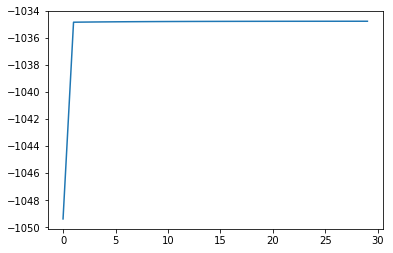

LL with fitted params: -1034.755754735206
LL with true params: -1059.7229160265022
Best state sequence for: [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [79]:
if __name__ == '__main__':
    fit_coin()